In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

In [2]:
warnings.filterwarnings('ignore')

In [3]:
file_path = 'credit_risk_assessment .csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,age,income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         32581 non-null  int64  
 1   income                      32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,age,income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
(df.isnull().sum() / len(df)) * 100

age                           0.000000
income                        0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [8]:
df['loan_status'].value_counts(normalize=True) * 100

loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64

In [9]:
# Remove outliers
df_cleaned = df.copy()
df_cleaned = df_cleaned[df_cleaned['age'] <= 100]
df_cleaned = df_cleaned[df_cleaned['income'] <= 500000]
df_cleaned = df_cleaned[df_cleaned['person_emp_length'] <= 60]

# Impute missing values
# Impute 'person_emp_length' with median
emp_length_median = df_cleaned['person_emp_length'].median()
df_cleaned['person_emp_length'].fillna(emp_length_median, inplace=True)

# Impute 'loan_int_rate' with median
loan_int_rate_median = df_cleaned['loan_int_rate'].median()
df_cleaned['loan_int_rate'].fillna(loan_int_rate_median, inplace=True)

# Confirm shape and missing values
print(df_cleaned.shape)
print(df_cleaned.isnull().sum())


(31628, 12)
age                           0
income                        0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


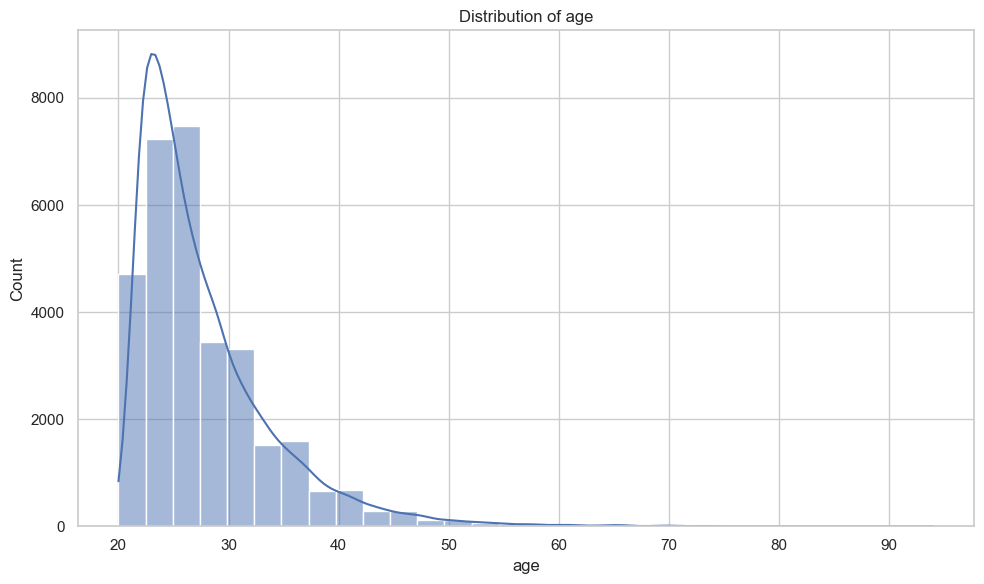

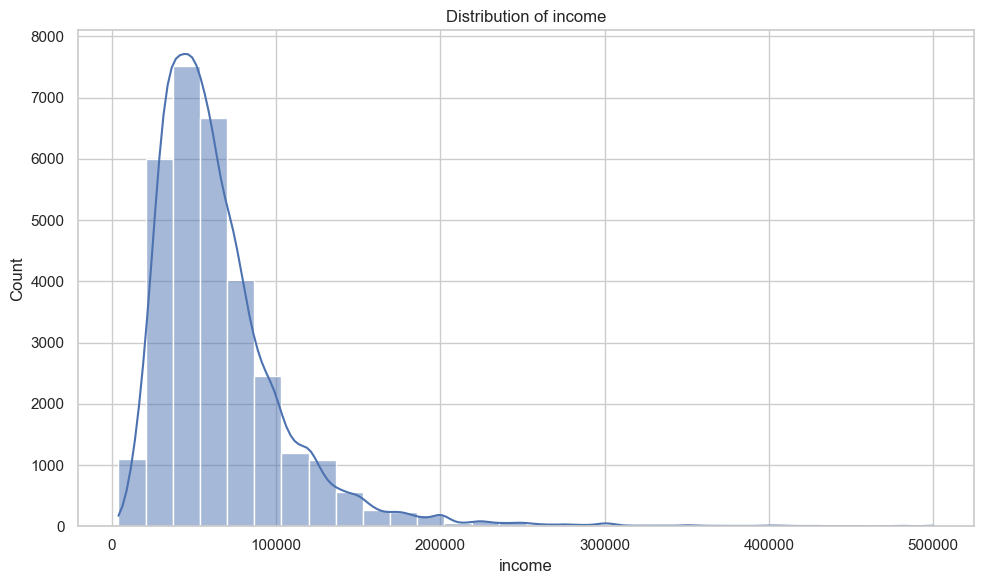

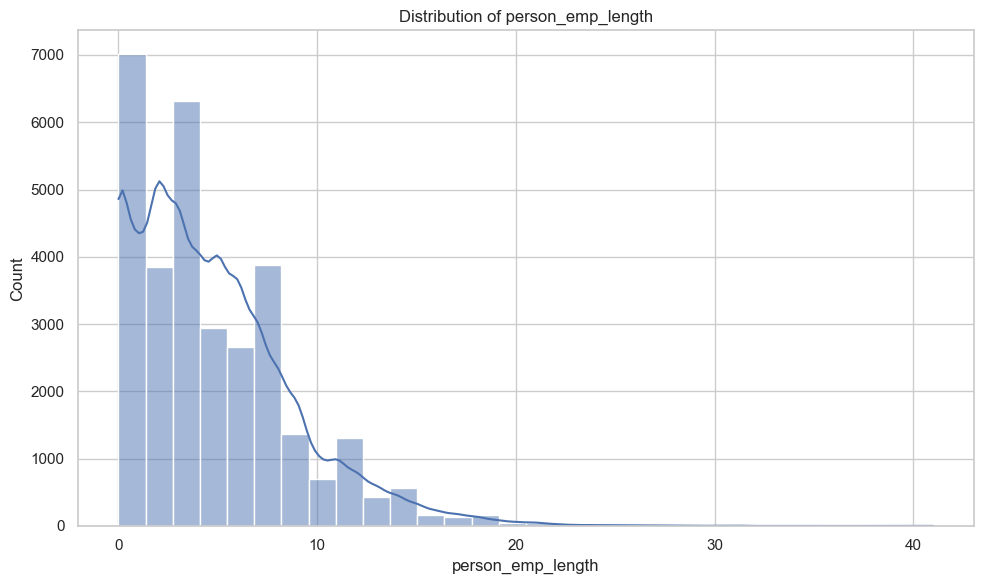

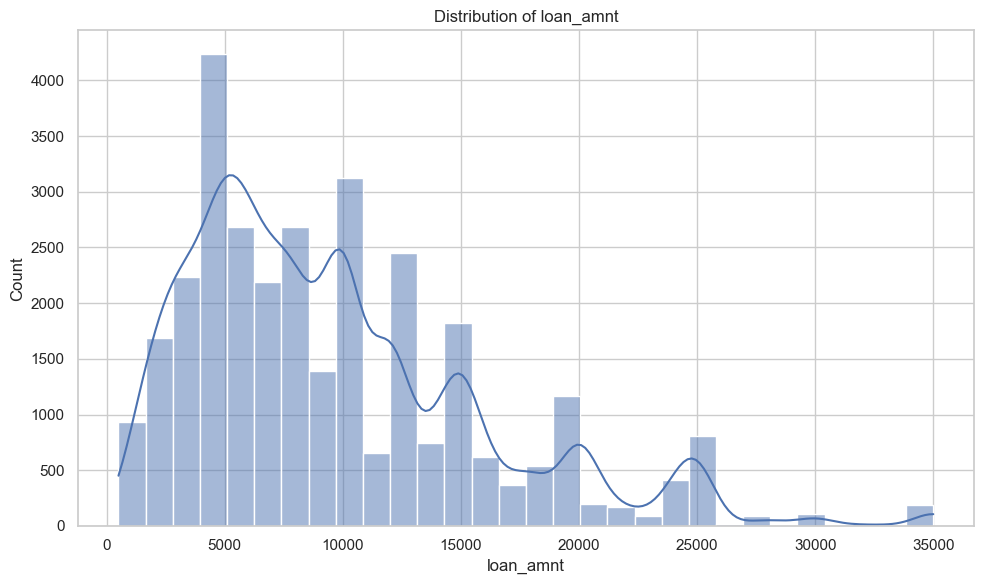

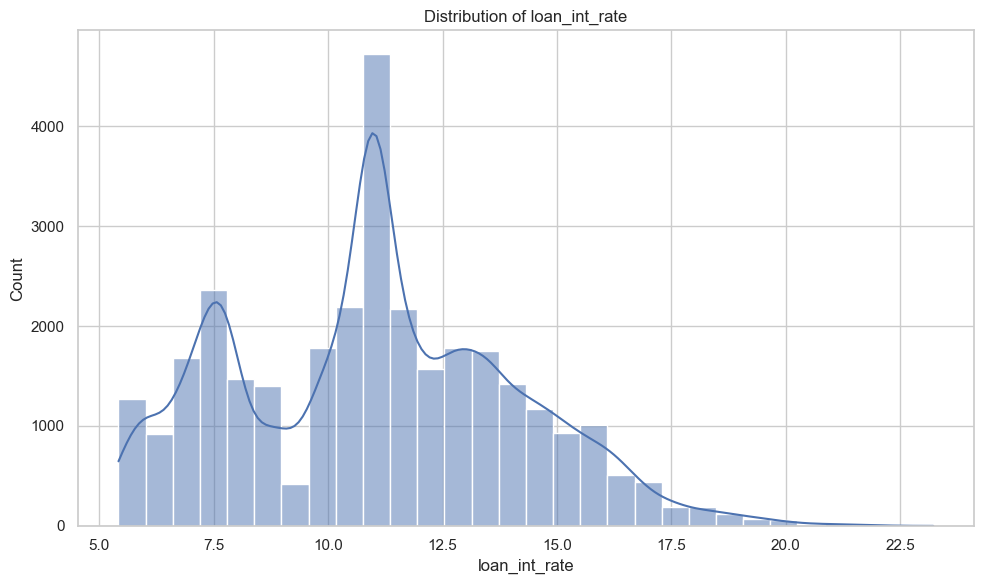

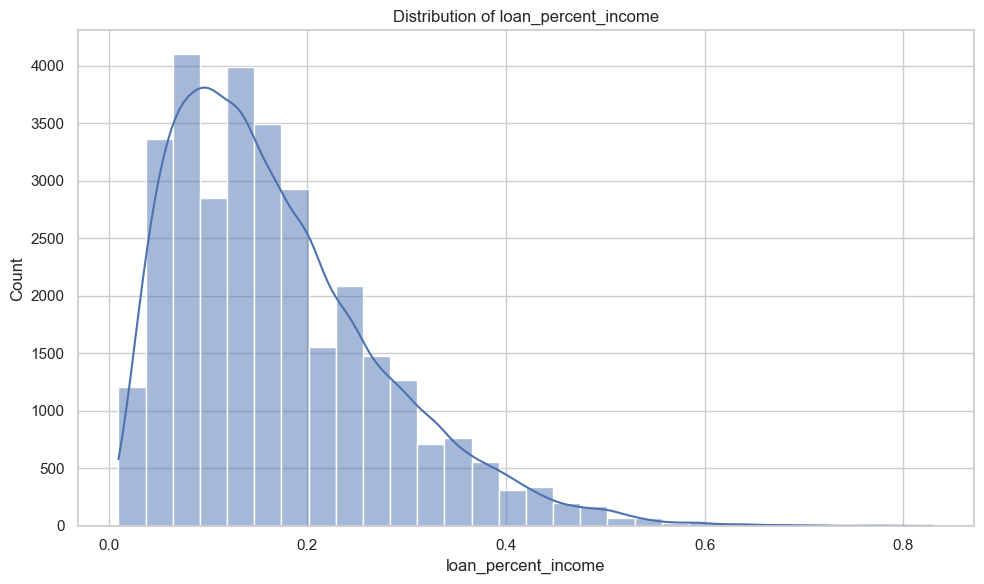

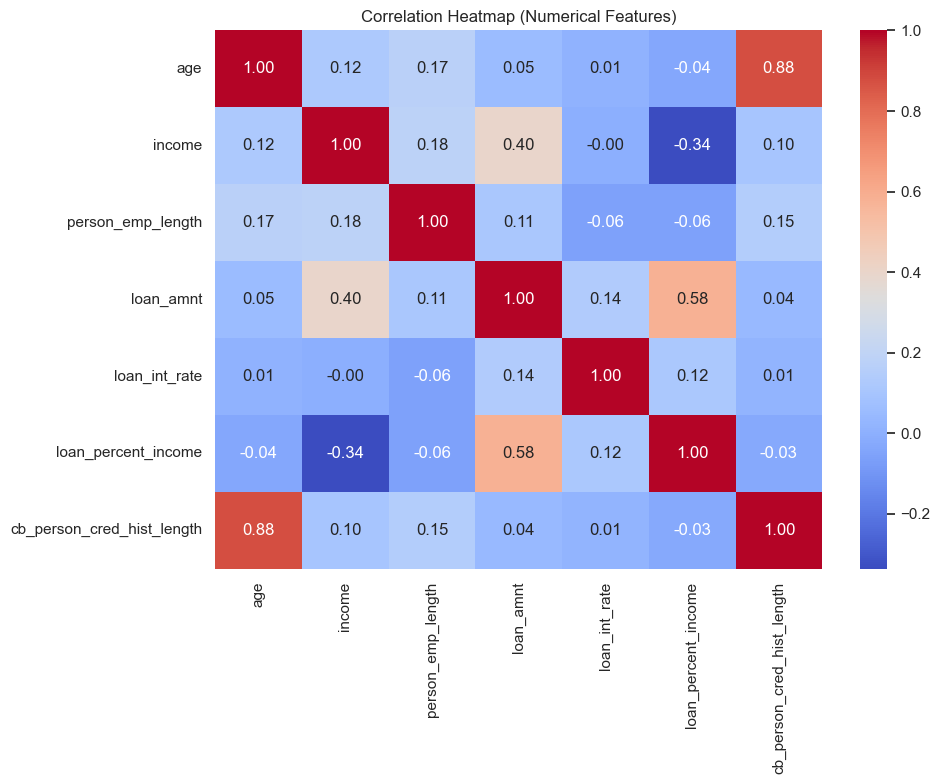

In [10]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
numeric_cols = ['age', 'income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income']

# Plot histograms
for col in numeric_cols:
    plt.figure()
    sns.histplot(data=df_cleaned, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_cleaned[numeric_cols + ['cb_person_cred_hist_length']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()


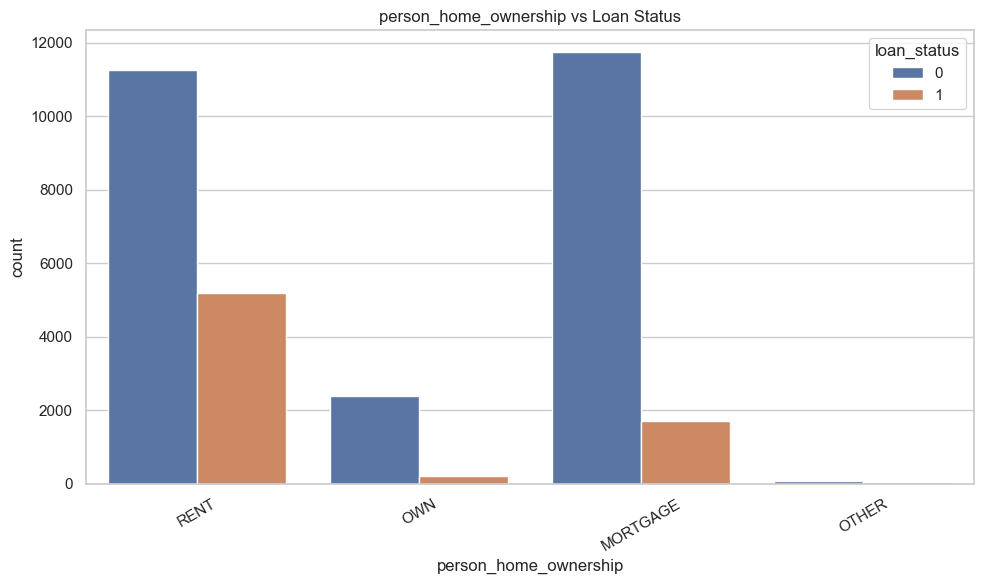

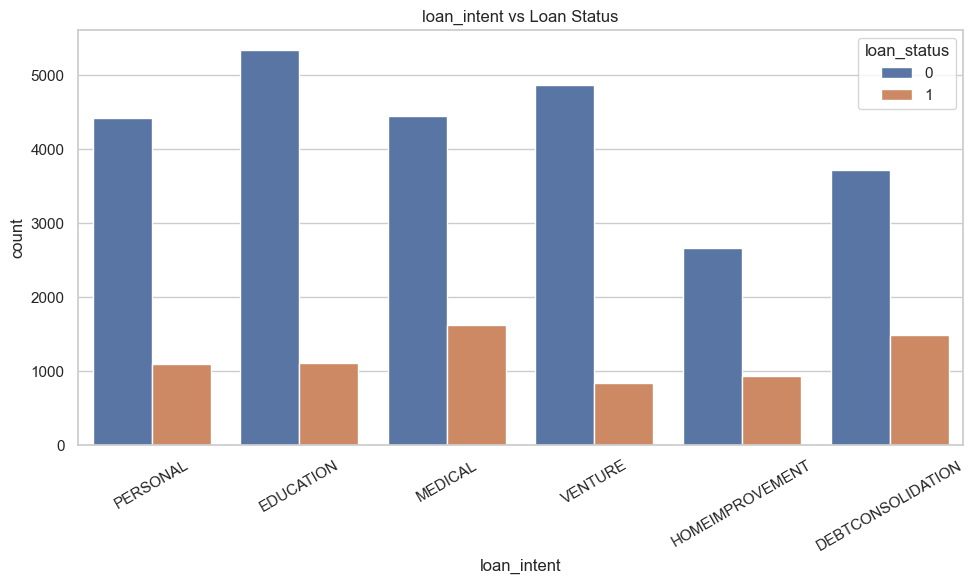

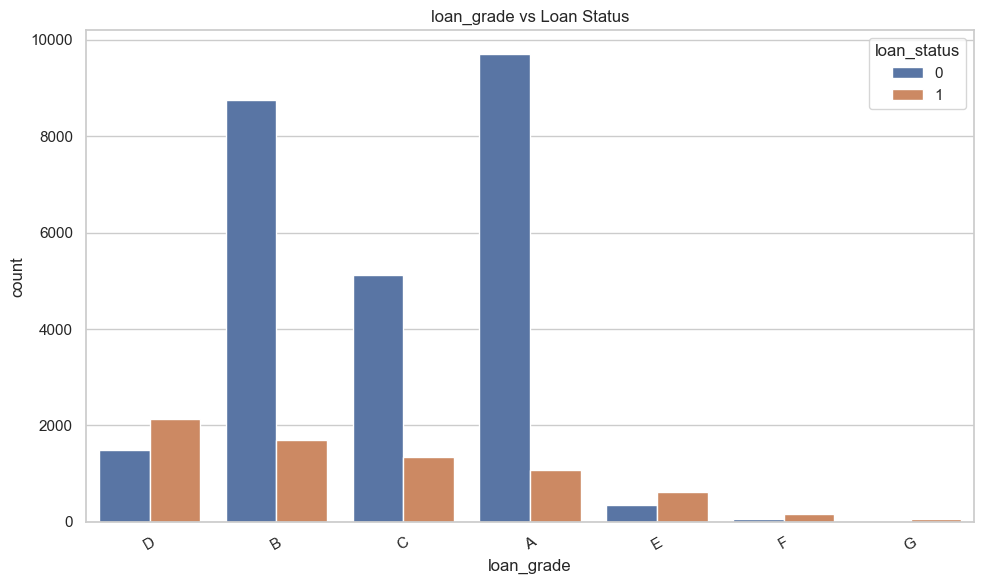

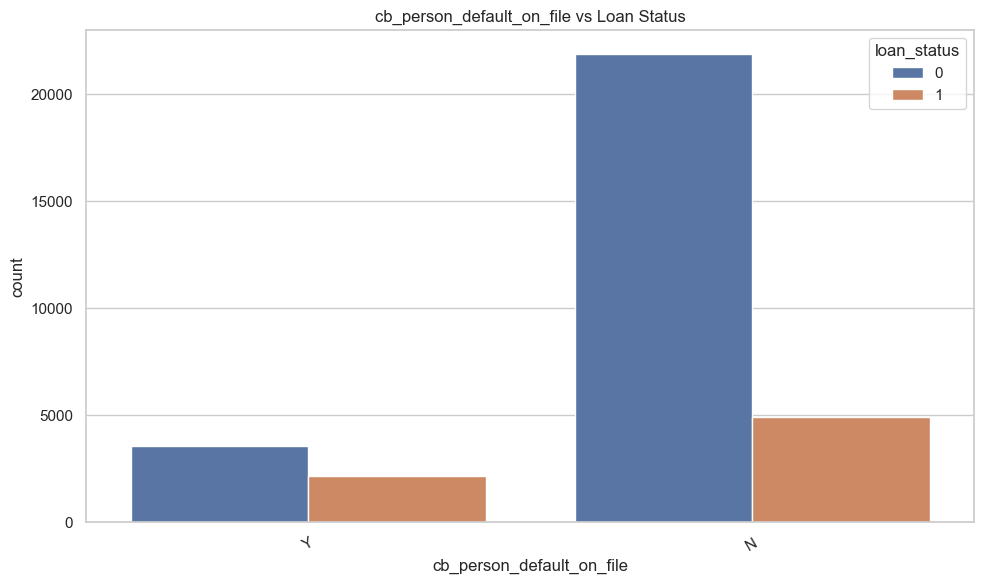

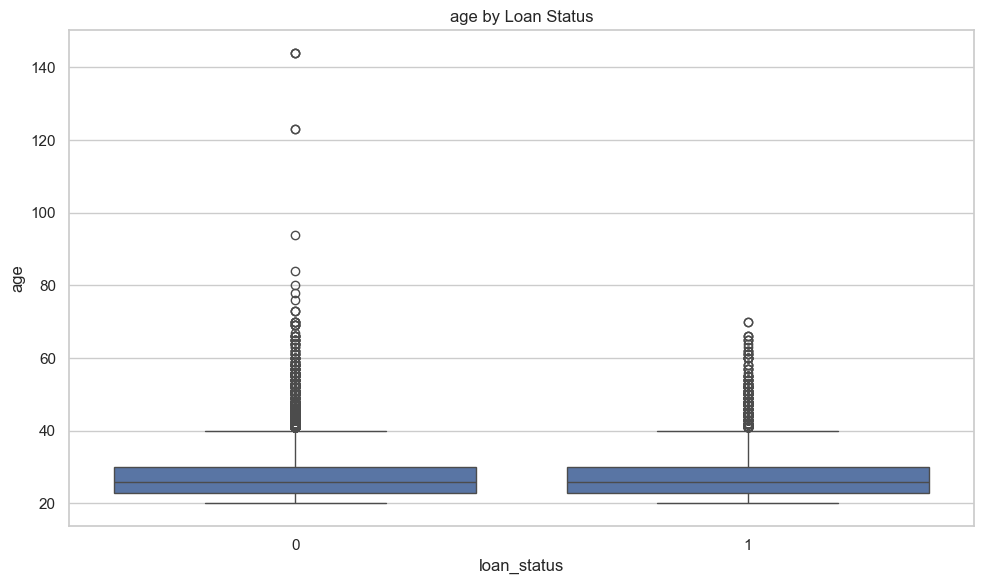

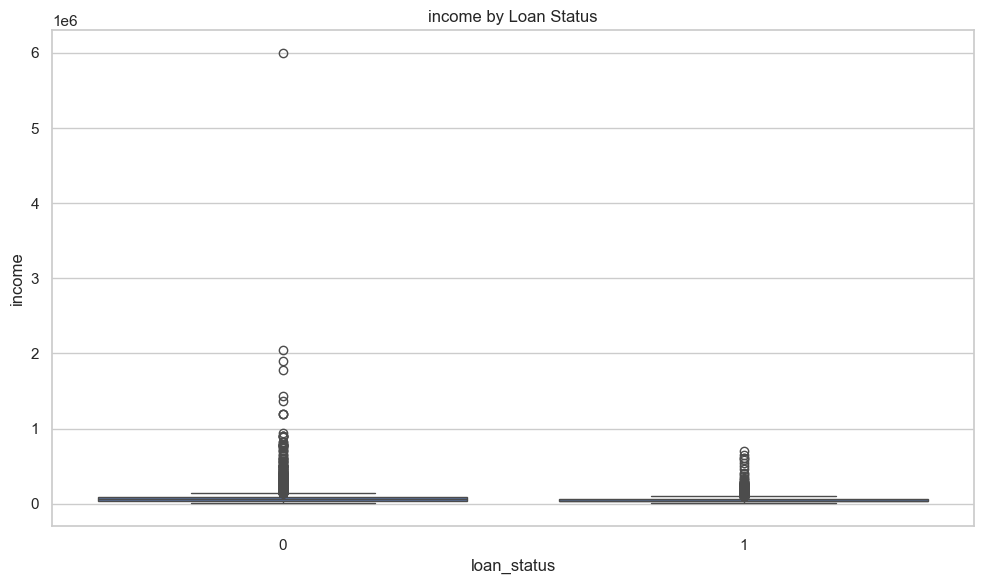

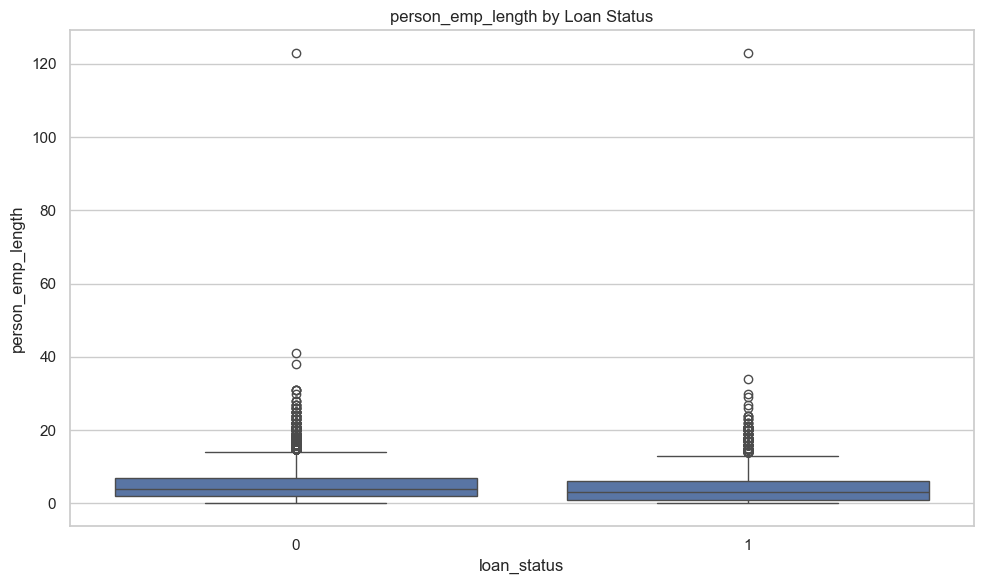

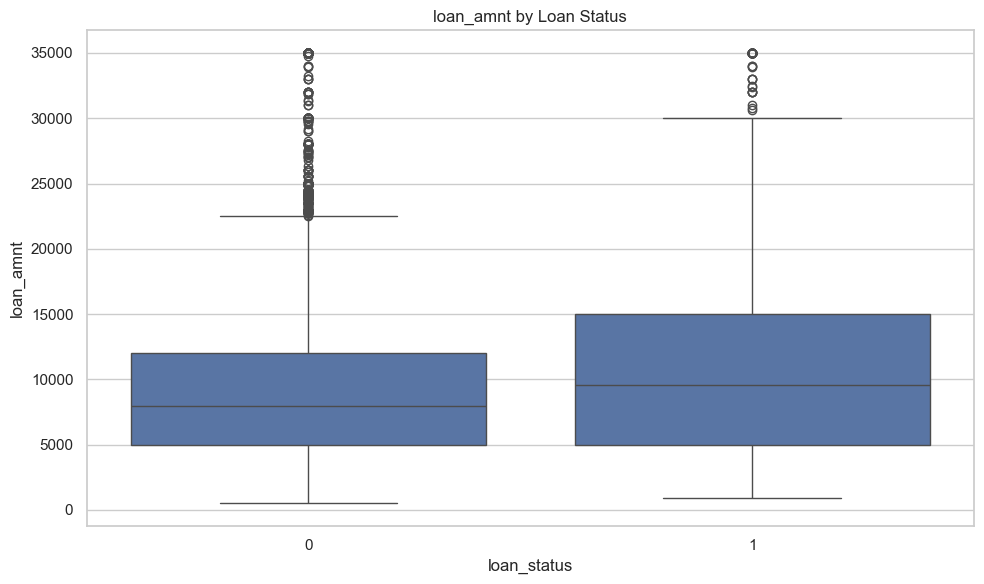

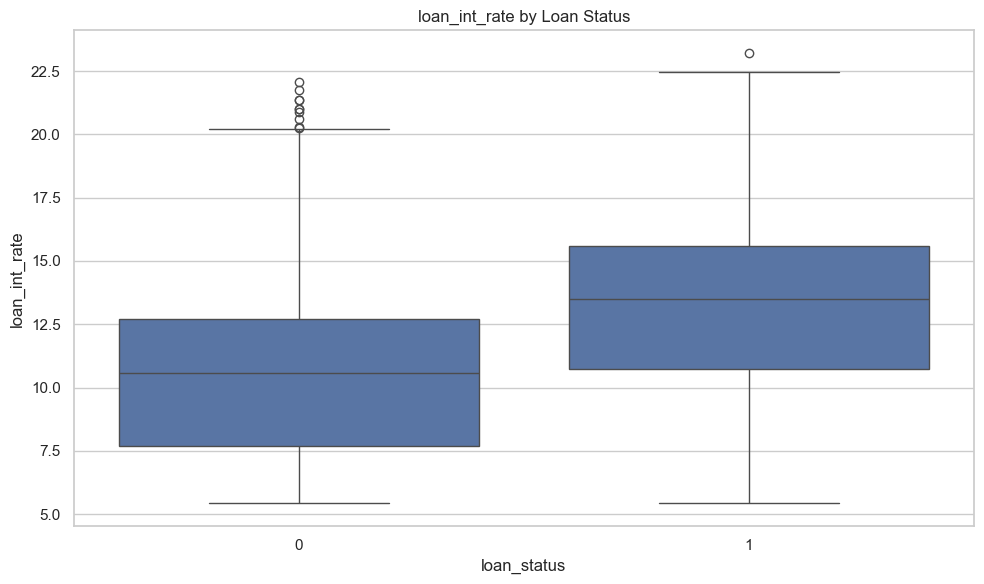

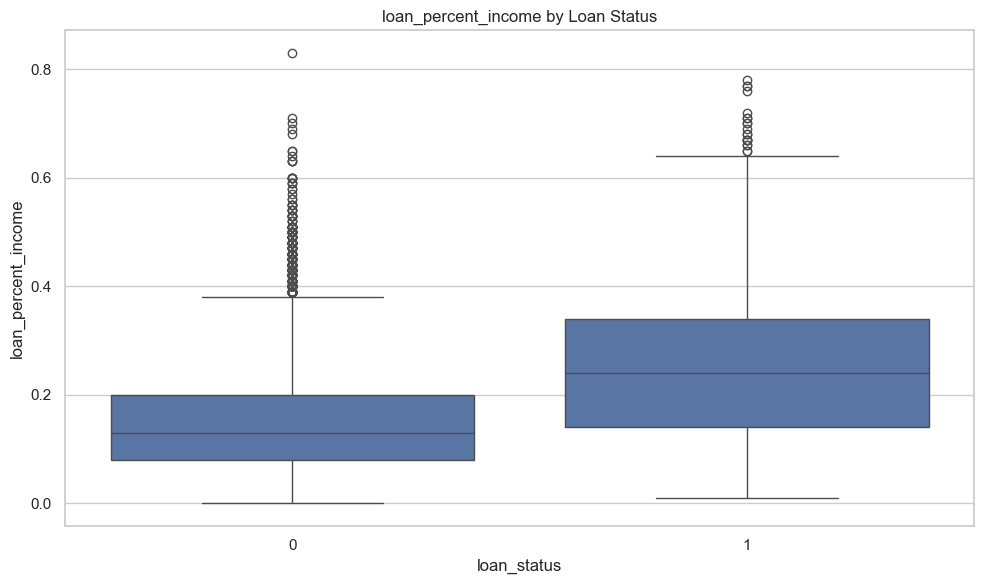

In [11]:
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue='loan_status')
    plt.title(f'{col} vs Loan Status')
    plt.xticks(rotation=30)
    plt.tight_layout()

# === 4. Box Plots for Numeric vs. Loan Status ===
for col in numeric_cols:
    plt.figure()
    sns.boxplot(data=df, x='loan_status', y=col)
    plt.title(f'{col} by Loan Status')
    plt.tight_layout()

plt.show()

In [12]:
X = df_cleaned.drop(columns=['loan_status'])
y = df_cleaned['loan_status']
X_encoded = pd.get_dummies(X, drop_first=True)
numeric_features = ['age', 'income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
scaler = StandardScaler()
X_encoded[numeric_features] = scaler.fit_transform(X_encoded[numeric_features])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_proba_lr = lr.predict_proba(X_test)[:, 1]

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
# Manually tuned XGBoost
xgb = XGBClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
# Evaluation function
def evaluate_model(y_true, y_pred, y_proba, model_name):
    print(f"\nModel: {model_name}")
    print("Accuracy:", (y_pred == y_true).mean())
    print("ROC AUC Score:", roc_auc_score(y_true, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, y_pred_lr, y_proba_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, y_proba_xgb, "XGBoost")


Model: Logistic Regression
Accuracy: 0.8710085361998103
ROC AUC Score: 0.8778230682217109
Confusion Matrix:
 [[4746  216]
 [ 600  764]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      4962
           1       0.78      0.56      0.65      1364

    accuracy                           0.87      6326
   macro avg       0.83      0.76      0.79      6326
weighted avg       0.86      0.87      0.86      6326


Model: Random Forest
Accuracy: 0.9350300347771103
ROC AUC Score: 0.9345599134064048
Confusion Matrix:
 [[4928   34]
 [ 377  987]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      4962
           1       0.97      0.72      0.83      1364

    accuracy                           0.94      6326
   macro avg       0.95      0.86      0.89      6326
weighted avg       0.94      0.94      0.93      6326


Model: XGBoost
Accuracy: 0.92